In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [3]:
df_raw = pd.read_csv('Credit_card.csv') # reading url dataset

In [4]:
df_raw1 = pd.read_csv('Credit_card_label.csv')

In [5]:
df1 = pd.merge(df_raw, df_raw1, on='Ind_ID', how='outer')

In [6]:
df = df1.copy() # creating a copy of read file

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


### Filling the Missing Values

In [9]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [10]:
import missingno as msno # library to examine missing values

<Axes: >

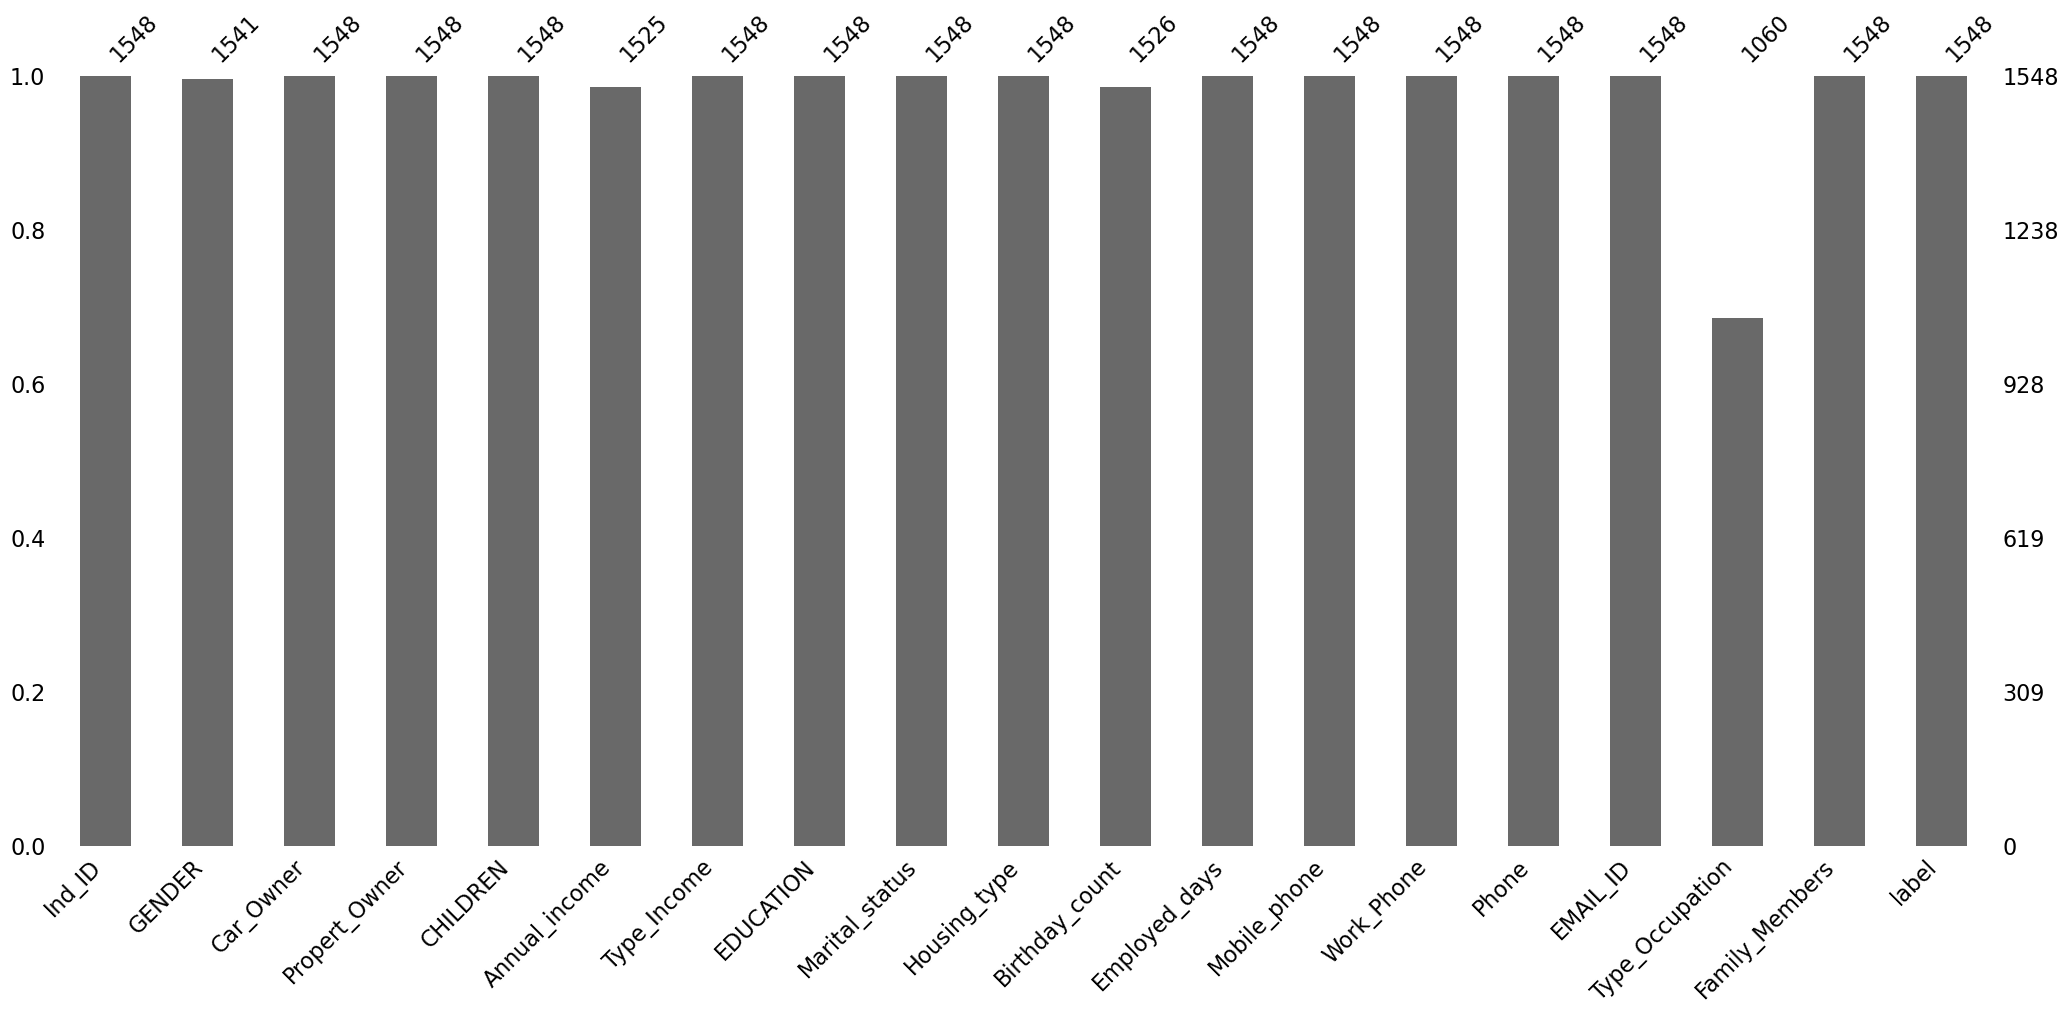

In [11]:
msno.bar(df)

<Axes: >

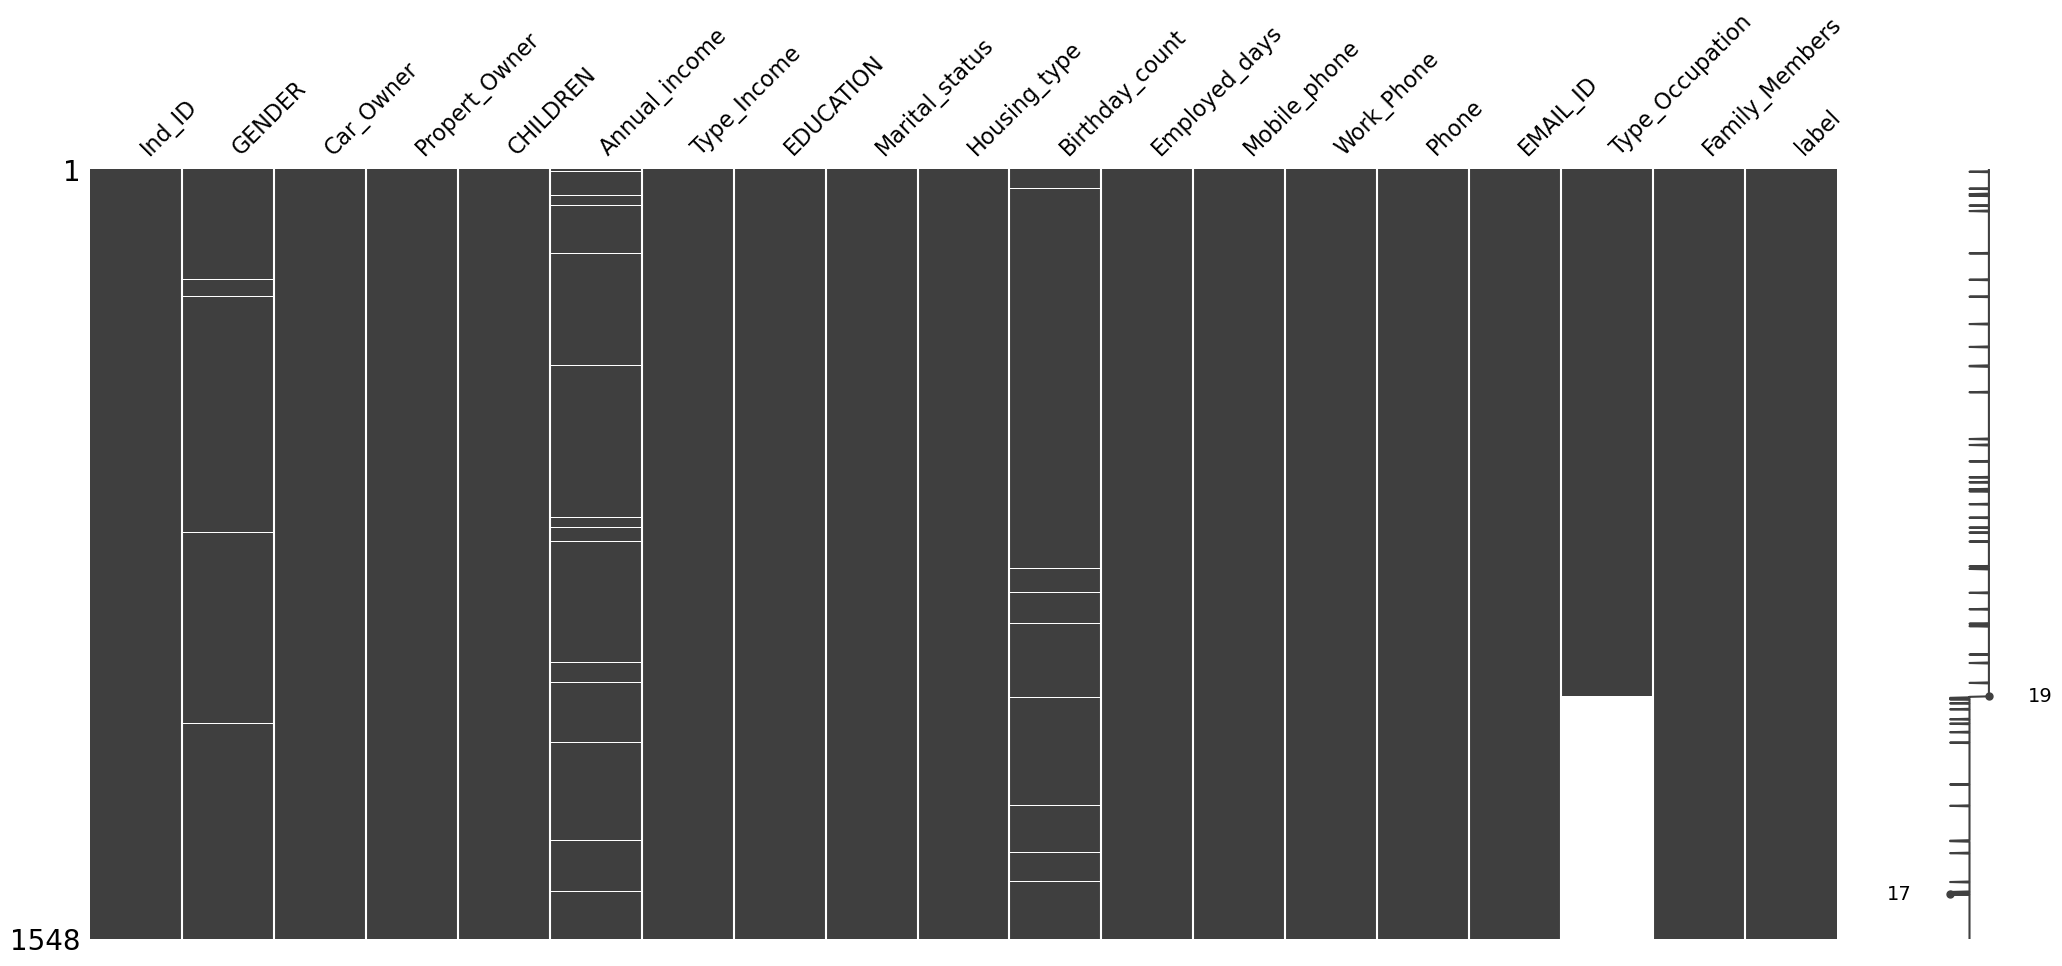

In [12]:
sorted = df.sort_values('Type_Occupation') # sorting values based on culmen depth
msno.matrix(sorted)

<Axes: >

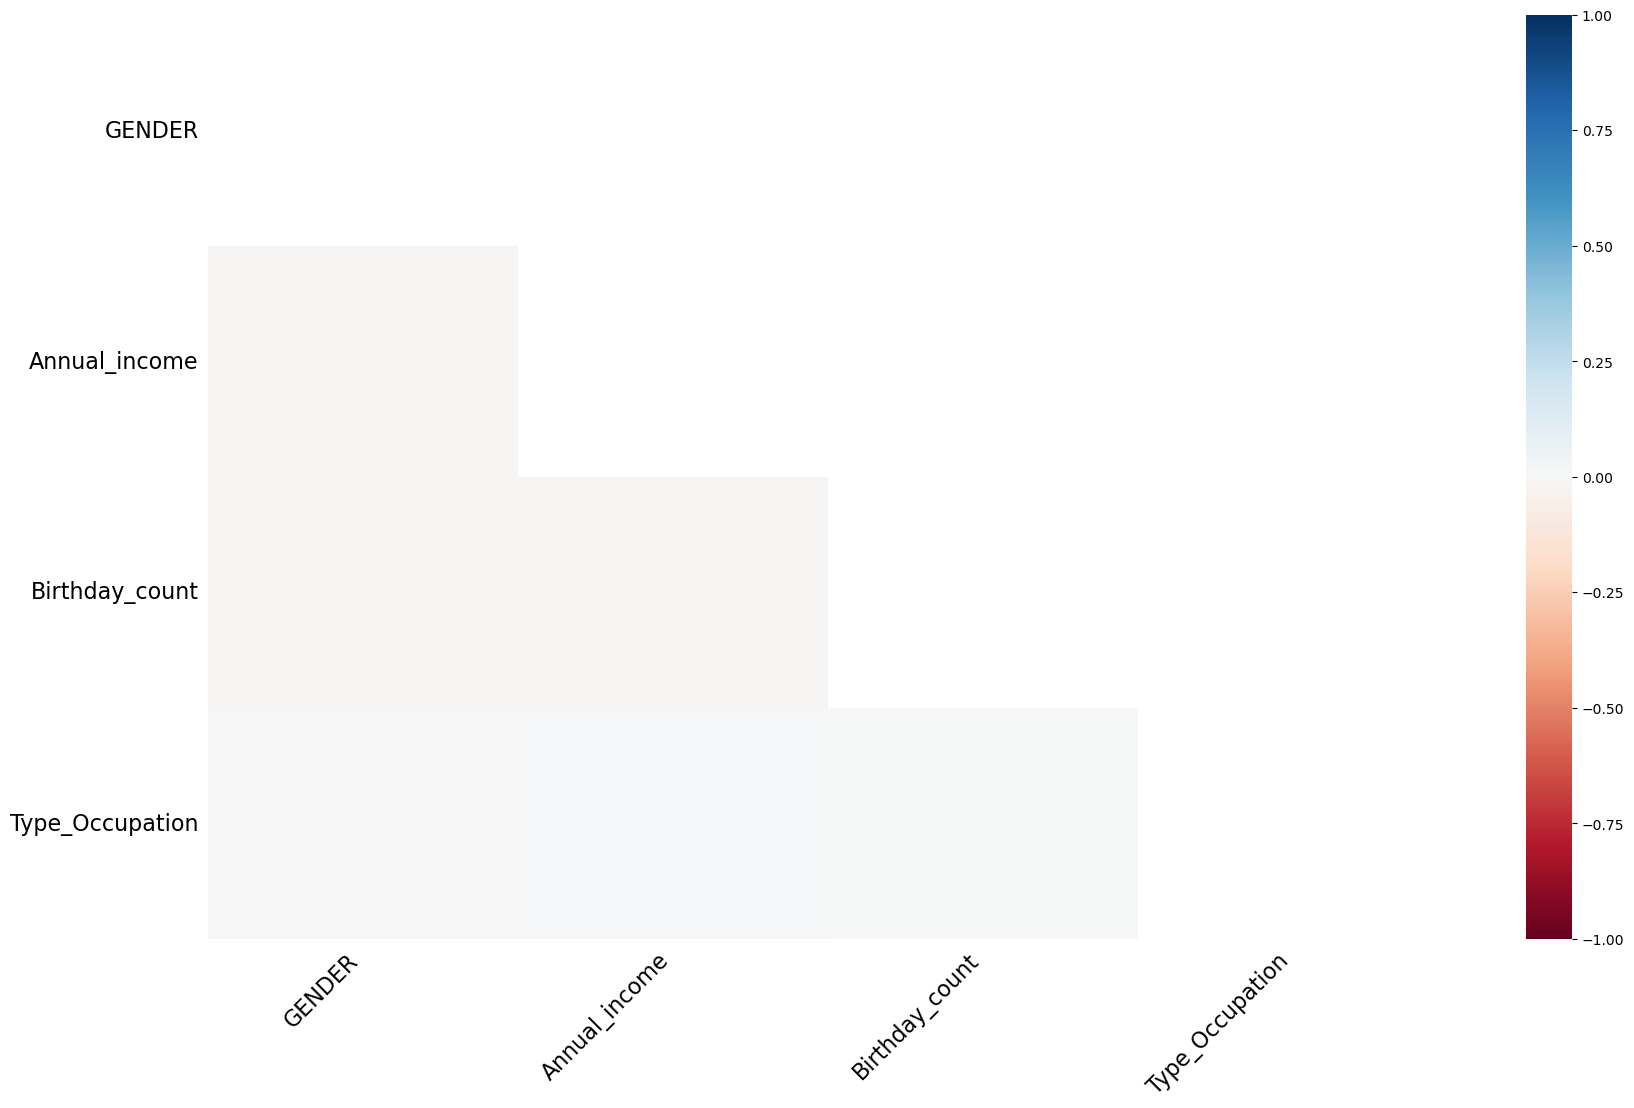

In [13]:
msno.heatmap(df) # creating heatmap on correaltion

In [14]:
df = df.drop('Type_Occupation', axis=1)

In [15]:
df = df.rename(columns={'Birthday_count': 'Age'})
df = df.rename(columns={'Employed_days': 'Employed_Years'})

<Axes: ylabel='Annual_income'>

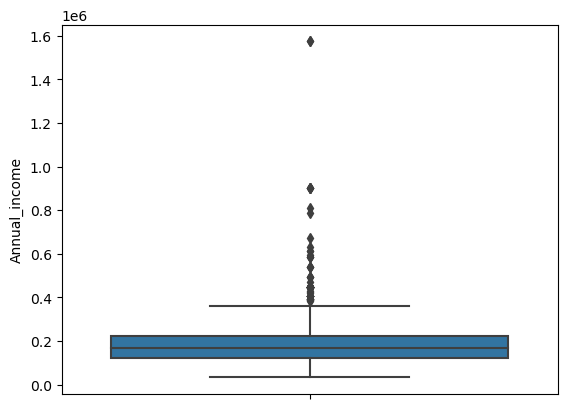

In [16]:
sns.boxplot(y=df['Annual_income']) ##Checking the skewness

In [17]:
##filling the values of Annual income with median values due to skewness in data
df['Annual_income'] = df['Annual_income'].fillna(df['Annual_income'].median())

<Axes: ylabel='Age'>

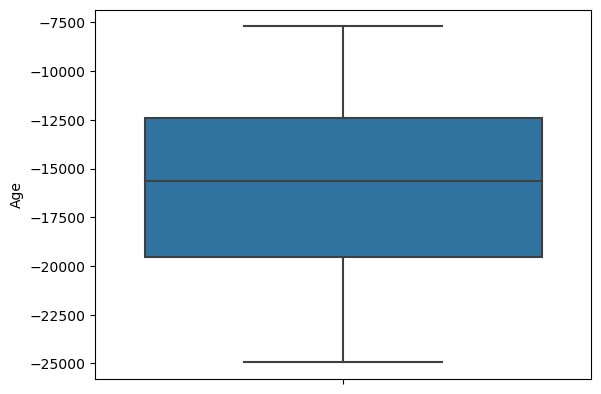

In [18]:
sns.boxplot(y=df['Age']) ####Checking the skewness of Birthday_count

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  ##filling the values of age with mean values due to no skewness in data

In [20]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0]) ##filling the values of GENDER with mode values due to 

In [21]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.910294e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124483e+05,4199.321477,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19476.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15814.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12483.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [22]:
##Convert the 'Birthday' column to datetime objects
df['Age'] = pd.to_datetime(df['Age'])

In [23]:
current_date = datetime.now()
df['Age'] = (current_date - df['Age']).astype('<m8[Y]')

In [29]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.548000e+03,1548.0,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.910294e+05,53.0,174.671177,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124483e+05,0.0,371.830056,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,53.0,0.199863,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,53.0,3.178645,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,53.0,6.787132,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,53.0,16.546201,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,53.0,999.980835,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [25]:
df['Employed_Years'] = df['Employed_Years'].abs()

In [26]:
# Define the number of days in a year
# Accounting for leap years
days_in_a_year = 365.25  

In [27]:
# Calculate the number of years employed
df['Employed_Years'] = df['Employed_Years'] / days_in_a_year

In [28]:
df.describe()


,Ind_ID,CHILDREN,Annual_income,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.548000e+03,1548.0,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.910294e+05,53.0,174.671177,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.124483e+05,0.0,371.830056,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,53.0,0.199863,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,53.0,3.178645,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,53.0,6.787132,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,53.0,16.546201,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,53.0,999.980835,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


### Outlier Treatment

<Axes: xlabel='Employed_Years', ylabel='Density'>

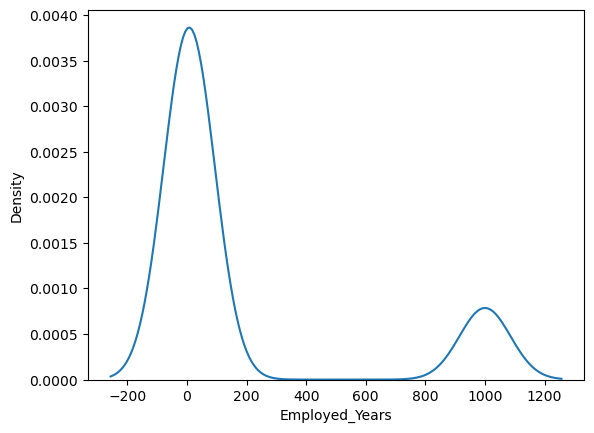

In [33]:
sns.kdeplot(df['Employed_Years'])

<Axes: ylabel='Employed_Years'>

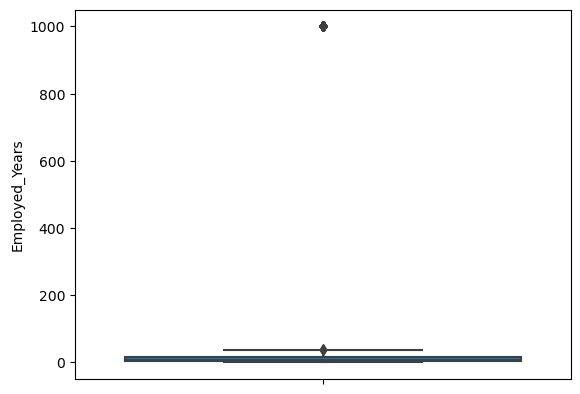

In [34]:
sns.boxplot(y=df['Employed_Years'])

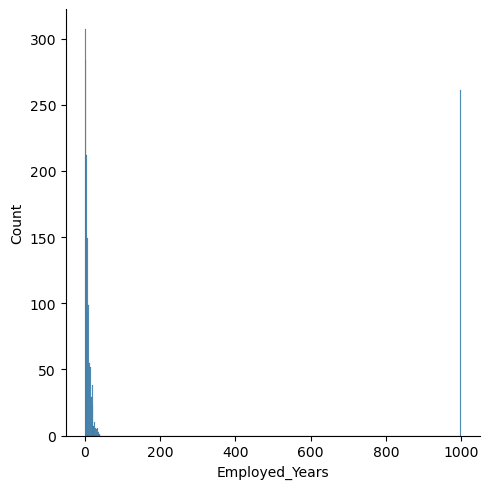

In [35]:
sns.displot(df['Employed_Years'])

In [36]:
from scipy import stats

In [45]:
df['E_Y'] = np.sqrt(df['Employed_Years'])

<Axes: xlabel='E_Y', ylabel='Density'>

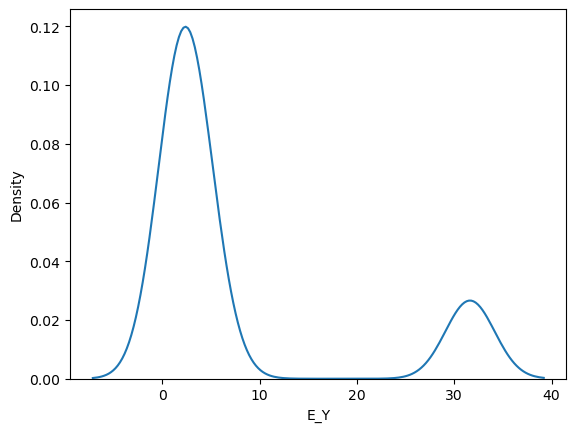

In [47]:
sns.kdeplot(df['E_Y'])

<Axes: xlabel='Annual_income', ylabel='Density'>

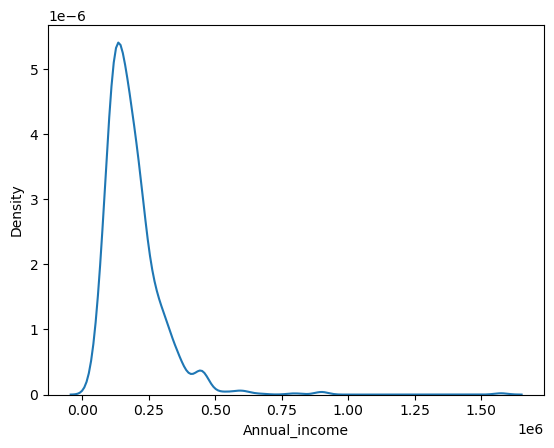

In [52]:
sns.kdeplot(df['Annual_income'])

In [53]:
df['Income'] = np.sqrt(df['Annual_income'])

In [54]:
df['Income2'] = np.log(df['Annual_income'])

In [62]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,E_Y
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,53.0,999.980835,1,0,0,0,2,1,31.622474
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,53.0,1.604381,1,1,1,0,2,1,1.266641
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,53.0,1.604381,1,1,1,0,2,1,1.266641
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,53.0,1.604381,1,1,1,0,2,1,1.266641
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,53.0,1.604381,1,1,1,0,2,1,1.266641


In [66]:
z = stats.zscore(df['Annual_income'])
z

0      -0.098116
1       1.102824
2       1.102824
3      -0.218210
4       1.102824
          ...   
1543   -0.218210
1544    0.302197
1545   -0.098116
1546    0.702511
1547    0.302197
Name: Annual_income, Length: 1548, dtype: float64

In [67]:
threshold = 3

b = np.where(z > 3)

print(np.where(z > 3))

(array([  25,   29,   95,  150,  151,  211,  233,  242,  378,  393,  515,
        557,  573,  587,  686,  811, 1068, 1076, 1355], dtype=int64),)


In [70]:
df = df.iloc[np.where(z <= 3)]

<Axes: >

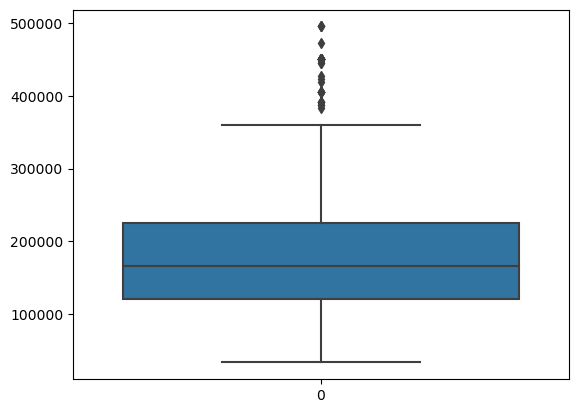

In [72]:
sns.boxplot(df['Annual_income'])

In [73]:
df['Income'] = np.log(df['Annual_income'])

<Axes: xlabel='Income', ylabel='Density'>

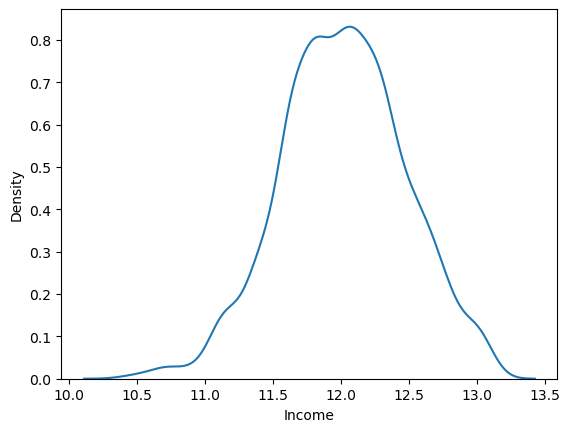

In [75]:
sns.kdeplot(df['Income'])

In [77]:
df['Annual_income'] = df['Income']

In [79]:
df['Employed_Years'] = df['E_Y']

### Encoding

In [83]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [84]:
encoder = LabelEncoder()

df['GENDER'] = encoder.fit_transform(df['GENDER'])

In [85]:
df['Car_Owner'] =  encoder.fit_transform(df['Car_Owner'])

In [86]:
df['Propert_Owner'] =  encoder.fit_transform(df['Propert_Owner'])

In [87]:
df = pd.get_dummies(df, columns=['Type_Income'], prefix=['Type_Income'])

In [92]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Age,...,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,Marital_status_encoded
0,5008827,1,1,1,0,12.100712,3,Married,0,53.0,...,0,0,0,2,1,0,1,0,0,0
1,5009744,0,1,0,0,12.660328,3,Married,0,53.0,...,1,1,0,2,1,1,0,0,0,0
2,5009746,0,1,0,0,12.660328,3,Married,0,53.0,...,1,1,0,2,1,1,0,0,0,0
3,5009749,0,1,0,0,12.022751,3,Married,0,53.0,...,1,1,0,2,1,1,0,0,0,0
4,5009752,0,1,0,0,12.660328,3,Married,0,53.0,...,1,1,0,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,12.022751,3,Married,0,53.0,...,0,0,0,2,0,1,0,0,0,0
1544,5023655,0,0,0,0,12.323856,2,Single / not married,0,53.0,...,0,0,0,1,0,1,0,0,0,1
1545,5115992,1,1,1,2,12.100712,3,Married,0,53.0,...,0,0,0,4,0,0,0,0,1,0
1546,5118219,1,1,0,0,12.506177,1,Civil marriage,0,53.0,...,1,1,0,2,0,0,0,0,1,2


In [89]:
# Define the order of education categories
education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']

# Create a custom mapping of categories to numerical values
education_mapping = {category: index for index, category in enumerate(education_order)}

# Apply ordinal encoding to the "Education" column
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

In [95]:
# Define the order of Marital_status categories
education_order = ['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']

# Create a custom mapping of categories to numerical values
education_mapping = {category: index for index, category in enumerate(education_order)}

# Apply ordinal encoding to the "Marital_status" column
df['Marital_status'] = df['Marital_status'].map(education_mapping)

In [91]:
# Define the order of Marital_status categories
education_order = ['House / apartment', 'With parents', 'Rented apartment', 'Municipal apartment', 'Co-op apartment', 'Office apartment' ]

# Create a custom mapping of categories to numerical values
education_mapping = {category: index for index, category in enumerate(education_order)}

# Apply ordinal encoding to the "Marital_status" column
df['Housing_type'] = df['Housing_type'].map(education_mapping)

In [93]:
df.insert(6, 'Type_Income_Commercial associate', df.pop('Type_Income_Commercial associate'))
df.insert(7, 'Type_Income_Pensioner', df.pop('Type_Income_Pensioner'))
df.insert(8, 'Type_Income_State servant', df.pop('Type_Income_State servant'))
df.insert(9, 'Type_Income_Working', df.pop('Type_Income_Working'))

In [100]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,...,Marital_status,Housing_type,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,12.100712,0,1,0,0,...,0,0,53.0,31.622474,1,0,0,0,2,1
1,5009744,0,1,0,0,12.660328,1,0,0,0,...,0,0,53.0,1.266641,1,1,1,0,2,1
2,5009746,0,1,0,0,12.660328,1,0,0,0,...,0,0,53.0,1.266641,1,1,1,0,2,1
3,5009749,0,1,0,0,12.022751,1,0,0,0,...,0,0,53.0,1.266641,1,1,1,0,2,1
4,5009752,0,1,0,0,12.660328,1,0,0,0,...,0,0,53.0,1.266641,1,1,1,0,2,1


In [82]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.529000e+03,1529.000000,1529.000000,1529.0,1529.000000,1529.0,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000
mean,5.078786e+06,0.408764,12.018482,53.0,7.397822,1.0,0.210595,0.311315,0.090909,2.159581,0.111184
std,4.171069e+04,0.776589,0.457239,0.0,10.992169,0.0,0.407865,0.463183,0.287574,0.949325,0.314462
min,5.008827e+06,0.000000,10.426736,53.0,0.447061,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045069e+06,0.000000,11.707670,53.0,1.783643,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.074735e+06,0.000000,12.022751,53.0,2.607838,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115662e+06,1.000000,12.323856,53.0,4.094369,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,13.112313,53.0,31.622474,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


### ML Model

In [110]:
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [102]:
df_train, df_test = train_test_split(df, test_size = 0.2 , train_size = 0.8 )

In [104]:
 X_train = df_train.drop('label', axis = 1)

In [105]:
X_train.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION,Marital_status,Housing_type,Age,Employed_Years,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
780,5136976,0,0,0,0,12.631340,0,0,1,0,3,0,0,53.0,3.911058,1,0,0,0,2
1391,5112736,1,1,1,0,12.660328,0,0,0,1,3,0,0,53.0,2.766773,1,0,0,0,2
1007,5117753,1,1,0,0,12.631340,0,0,0,1,1,0,0,53.0,2.124786,1,0,0,0,2
1211,5042130,0,0,0,0,12.419166,0,0,0,1,3,0,0,53.0,4.501122,1,1,1,0,2
376,5010397,0,1,1,1,12.323856,0,0,0,1,3,0,0,53.0,2.087084,1,1,1,0,3


In [107]:
Y_train = df_train['label']
Y_train.head()

780     0
1391    0
1007    0
1211    0
376     0
Name: label, dtype: int64

In [108]:
X_test = df_test.drop('label', axis = 1)
Y_test = df_test['label']

In [111]:
scaler = MinMaxScaler()

In [113]:
numvars = ['Ind_ID', 'CHILDREN' ,'Annual_income','Age','Employed_Years', 'Family_Members','label']

In [117]:
 X_train=scaler.fit_transform( X_train)

In [118]:
 X_test=scaler.transform(X_test)

In [120]:
X_test

array([[0.58779328, 1.        , 1.        , ..., 0.        , 0.        ,
        0.07142857],
       [0.68356777, 0.        , 0.        , ..., 0.        , 0.        ,
        0.07142857],
       [0.09117539, 0.        , 0.        , ..., 0.        , 0.        ,
        0.07142857],
       ...,
       [0.90769253, 0.        , 0.        , ..., 1.        , 0.        ,
        0.07142857],
       [0.82657148, 0.        , 1.        , ..., 1.        , 0.        ,
        0.07142857],
       [0.90777743, 0.        , 1.        , ..., 0.        , 0.        ,
        0.07142857]])

In [116]:
#Applying the machine learning to the data

In [121]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [129]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [124]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## **1.Confusion Matrix**

In [126]:
confusion_mat=confusion_matrix(Y_test, logistic_reg_pred)
confusion_mat

array([[274,   0],
       [ 32,   0]], dtype=int64)

## **2. Accuracy Score**

In [128]:
### accuracy using accuracy_score
print(round(accuracy_score(Y_test, logistic_reg_pred), 2))

0.9
